In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gaussian model

## 1. Import lib

In [66]:
## ML lib imports 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # version 0.18.1


## Ploting lib 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"

## Other imports
import numpy as np
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

## 2. Load data

In [40]:
iris = datasets.load_iris()
data = iris.data 
target = iris.target

## 3. Define model

In [41]:
clf = GaussianNB()

## 4. Train model

In [42]:
clf.fit(data, target)

GaussianNB()

## 5. Make prediction on train data 

In [43]:
result = clf.predict(data)

## 6. Accuracy

In [44]:
accuracy_score(result, target)

0.96

## 7. Confusion matrix

In [45]:
conf = confusion_matrix(target, result)
conf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

## 8. Plot confusion matrix

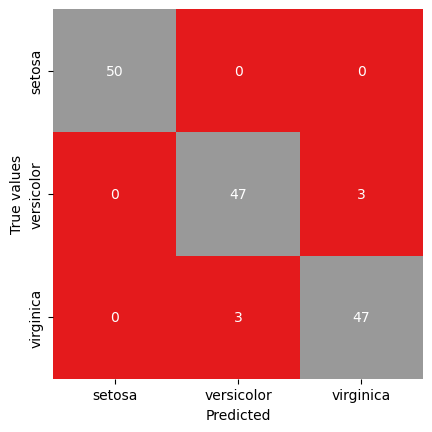

In [185]:
sns.heatmap(conf, square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names),
    cmap="Set1")
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.show()


## 9. External validation 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=0)

### 9.1 train model on training set and evaluate the model 

Accuracy score on the training set : 0.96


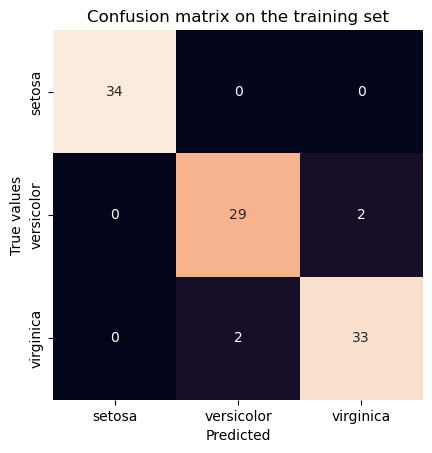

In [48]:
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(f"Accuracy score on the training set : {accuracy_score(y_train, y_train_pred)}")
sns.heatmap(
    confusion_matrix(y_train,y_train_pred), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names))

plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set")
plt.show()

### 9.2 Cross validation

Pas cross validation 

Accuracy score on the training set : 0.96


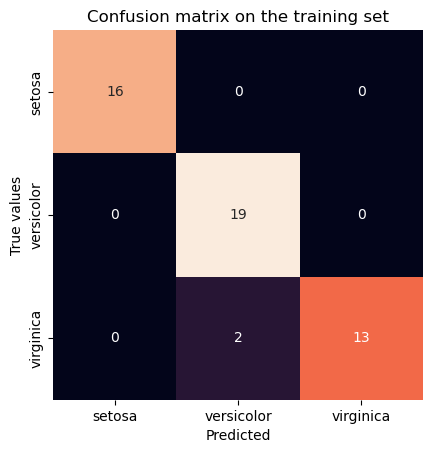

In [49]:
y_test_pred = clf.predict(X_test)
print(f"Accuracy score on the training set : {accuracy_score(y_test, y_test_pred)}")
sns.heatmap(
    confusion_matrix(y_test,y_test_pred), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names))

plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set")
plt.show()

## 10. Reduction of dimensionality

In [50]:
data_2D = iris.data[:, :2]
target_2D = iris.target

### 10.1 Construction of the model 

Accuracy score on the training set : 0.78


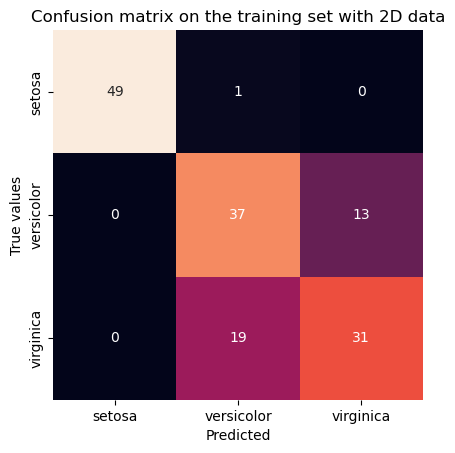

In [51]:
clf_2D = GaussianNB()
clf_2D.fit(data_2D, target_2D)
y_pred_3D = clf_2D.predict(data_2D)
print(f"Accuracy score on the training set : {accuracy_score(target_2D, y_pred_3D)}")
sns.heatmap(
    confusion_matrix(target_2D,y_pred_3D), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names)
    )
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set with 2D data")
plt.show()


## 11. Descision zone 

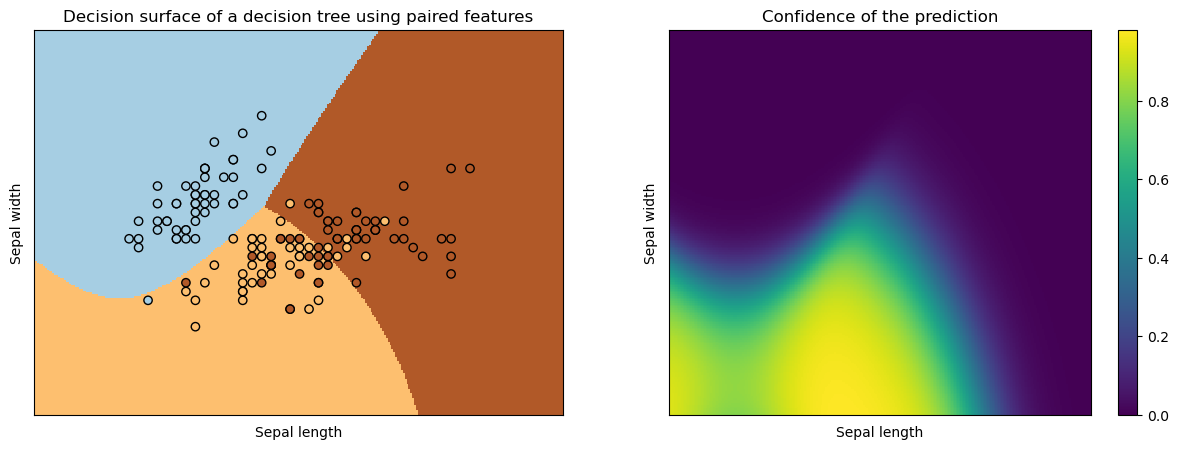

In [180]:
def plot_decision_boundary(X, y, clf):
    reduced_data = X[:, :2]
    model = clf()
    model.fit(reduced_data, y)
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    fig,ax = plt.subplots(1,2,figsize=(15,5))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax[0].pcolormesh(xx, yy, Z,cmap=plt.cm.Paired)
    ax[0].scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax[0].set_xlabel('Sepal length')
    ax[0].set_ylabel('Sepal width')
    ax[0].set_xlim(xx.min(), xx.max())
    ax[0].set_ylim(yy.min(), yy.max())
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title("Decision surface of a decision tree using paired features")

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    p = ax[1].pcolormesh(xx, yy, Z,cmap="viridis")
    fig.colorbar(p,ax = ax[1])
    ax[1].set_xlabel('Sepal length')
    ax[1].set_ylabel('Sepal width')
    ax[1].set_xlim(xx.min(), xx.max())
    ax[1].set_ylim(yy.min(), yy.max())
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title("Confidence of the prediction")
    
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(data, target, GaussianNB, "Decision boundary")


### 11.2 Plot descision zone

### Predict proba 

In [186]:
x_min = data[:, 0].min() - 1
x_max = data[:, 0].max() + 1
y_min = data[:, 1].min() - 1
y_max = data[:, 1].max() + 1
h = 0.1
x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(x,y)
data_samples = list(zip(xx.ravel(), yy.ravel()))
Z = clf_2D.predict_proba(data_samples)
fig = go.Figure(go.Surface(
                x = xx.ravel(),
                y = yy.ravel(),
                z = Z, 
                colorscale = "Viridis",
                showscale = True, 
                opacity = 0.8
                ))

fig.update_layout(
    title = "Probability density",
    scene = dict(
        xaxis_title = "Sepal length",
        yaxis_title = "Sepal width",
        zaxis_title = "Probability",
        ),
    width = 700,
    margin = dict(r=20, l=10, b=10, t=10)
    
    )

fig.update_traces(contours_z=dict(
    show=True, usecolormap=True,
    highlightcolor="limegreen", project_z=True))

fig.update_layout(
    title='Probability on the choice', autosize=True,
    xaxis_title='Sepal length',
    yaxis_title='Sepal width',
)
fig.show()


## 12 3D with plotly

Accuracy score on the training set : 0.88


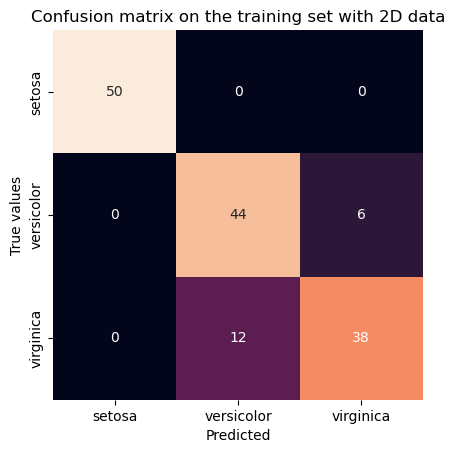

In [181]:
data_3D = iris.data[:, :3]
target_3D = iris.target

clf_3D = GaussianNB()
clf_3D.fit(data_3D, target_3D)
y_pred_3D = clf_3D.predict(data_3D)
print(f"Accuracy score on the training set : {accuracy_score(target_3D, y_pred_3D)}")
sns.heatmap(
    confusion_matrix(target_3D,y_pred_3D), square=True, annot=True, cbar=False,
    xticklabels=list(iris.target_names),
    yticklabels=list(iris.target_names)
    )
plt.xlabel("Predicted")
plt.ylabel("True values")
plt.title("Confusion matrix on the training set with 2D data")
plt.show()

In [187]:
df = pd.DataFrame(data_3D)
df.columns = ["sepal_length", "sepal_width", "petal_length"]
df["id_species"] = y_pred_3D
df["species_predict"] = df["id_species"].apply(lambda x: iris.target_names[x])

fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length',
              color='species_predict',
              symbol='species_predict',
              opacity=0.7,
              size='petal_length',
              size_max=18,
              )
fig.show()